# Mars Express Power Challenge

[https://kelvins.esa.int/mars-express-power-challenge/](https://kelvins.esa.int/mars-express-power-challenge/)

> The **Mars Express Power Challenge** focuses on the difficult problem of predicting the thermal power consumption. 
> Three full Martian years of [Mars Express](https://www.esa.int/Science_Exploration/Space_Science/Mars_Express/) telemetry are made available and you are challenged to predict the thermal subsystem power consumption on the following Martian year.

<br>based on the code of [github](https://github.com/lfsimoes)

---

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

----

## import libraries

In [2]:
# from echo_state_networks import *

import numpy as np

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 100


!{sys.executable} -m pip install gremlinpython==3.5.0 

from datetime import datetime
from gremlin_python.structure.graph import Graph
from gremlin_python.process.graph_traversal import __
from gremlin_python.driver.driver_remote_connection import DriverRemoteConnection

In [3]:
# import the helper functions: execute notebook and plot
%run helper/functions.ipynb

----

In [4]:
# https://github.com/rasbt/watermark
%load_ext watermark
%watermark -v -m -p numpy,scipy,matplotlib,seaborn,pandas,scikit-learn,tqdm,mlflow,pandas,wget,dvc

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 7.26.0

numpy       : 1.21.1
scipy       : 1.7.1
matplotlib  : 3.4.3
seaborn     : 0.11.2
pandas      : 1.3.1
scikit-learn: 0.0
tqdm        : 4.61.2
mlflow      : 1.19.0
wget        : 3.2
dvc         : 2.8.1

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.10.16.3-microsoft-standard-WSL2
Machine     : x86_64
Processor   : 
CPU cores   : 8
Architecture: 64bit



---

# 1. Download and Load Data

In [5]:
INPUT_DOWNLOAD_LOCAL = True
if ('INPUT_DOWNLOAD' in globals() and INPUT_DOWNLOAD) or INPUT_DOWNLOAD_LOCAL:
    print("Downloading and loading data")
    execute_notebook("create_dataset/", "load_dataset.ipynb")

power cols
NPWD2372 NPWD2401 NPWD2402 NPWD2451 NPWD2471 NPWD2472 NPWD2481 NPWD2482 NPWD2491 NPWD2501 NPWD2531 NPWD2532 NPWD2551 NPWD2552 NPWD2561 NPWD2562 NPWD2691 NPWD2692 NPWD2721 NPWD2722 NPWD2742 NPWD2771 NPWD2791 NPWD2792 NPWD2801 NPWD2802 NPWD2821 NPWD2851 NPWD2852 NPWD2871 NPWD2872 NPWD2881 NPWD2882
saaf cols
sa sx sy sz
ltdata cols
sunmars_km earthmars_km sunmarsearthangle_deg solarconstantmars eclipseduration_min occultationduration_min
dmop cols
AAA HHH MMM OOO PSF PWF SEQ SSS SXX TMB TTT VVV XXX ACF DMC DMF
CPU times: user 44.9 s, sys: 0 ns, total: 44.9 s
Wall time: 44.9 s
ftl cols
utb_ms ute_ms type flagcomms


In [6]:
file_name = 'mars-express-power-3years'

folder = '../data'
PATH_TO_DATA = folder + "/" + file_name + "/"

PATH_TRAIN_TO_PKL = PATH_TO_DATA + 'preprocessed/'
NAME_TRAIN_Y_TO_PKL = 'train_y.pkl'
NAME_TRAIN_X_TO_PKL = 'train_x.pkl'

---------------------

**Legend**
- IMLO = Interacting with Machine Learning Ontology


## IMLO3: Update relationship. 

    We can use Correlation Matrix, BERT, or PCA to detect the relationship between variables and
    then update automatically the field Relationship in each Feature. Or the Edge in the GraphQL

    Topic: ML Space Ontology 
    Status: Proposal

--------------------

# 2. Analyze data

A detailed explaination of the data is in the [Mars Express Power Challenge](https://kelvins.esa.int/mars-express-power-challenge/data/).

In this process, we also prune some rarely occuring event on the FTL files

Analyzing the data
Power thermal
                     NPWD2372  NPWD2401  NPWD2402  NPWD2451  NPWD2471  \
ut_ms                                                                   
2008-08-22 00:00:00  0.133582  0.001552  0.175436  0.657240  0.000747   
2008-08-22 01:00:00  0.217001  0.001498  0.175888  0.854918  0.000717   
2008-08-22 02:00:00  0.155922  0.001503  0.175389  1.079016  0.000719   

                     NPWD2472  NPWD2481  NPWD2482  NPWD2491  NPWD2501  ...  \
ut_ms                                                                  ...   
2008-08-22 00:00:00  0.000661  0.000585  0.001927  0.244648  0.005277  ...   
2008-08-22 01:00:00  0.000628  0.000551  0.001834  0.230870  0.005010  ...   
2008-08-22 02:00:00  0.000636  0.000568  0.001856  0.202746  0.005135  ...   

                     NPWD2792  NPWD2801  NPWD2802  NPWD2821  NPWD2851  \
ut_ms                                                                   
2008-08-22 00:00:00  0.000573  0.001526  0.159719  0.005753  0.0

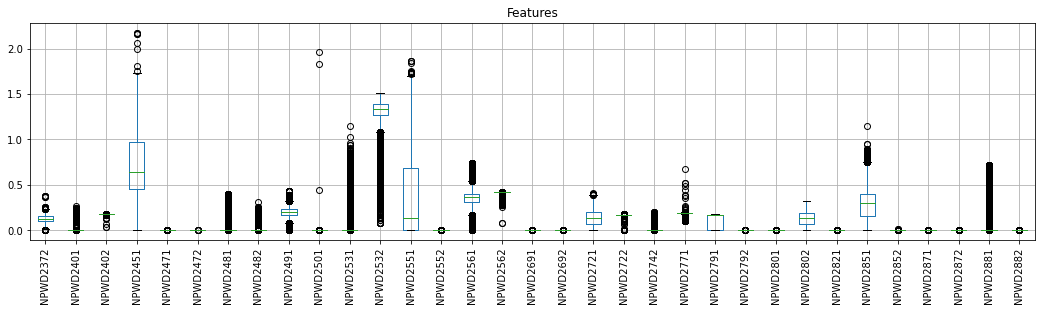

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65613 entries, 2008-08-22 00:00:00 to 2016-02-29 23:00:00
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NPWD2372  49125 non-null  float64
 1   NPWD2401  49125 non-null  float64
 2   NPWD2402  49125 non-null  float64
 3   NPWD2451  49125 non-null  float64
 4   NPWD2471  49125 non-null  float64
 5   NPWD2472  49125 non-null  float64
 6   NPWD2481  49125 non-null  float64
 7   NPWD2482  49125 non-null  float64
 8   NPWD2491  49125 non-null  float64
 9   NPWD2501  49125 non-null  float64
 10  NPWD2531  49125 non-null  float64
 11  NPWD2532  49125 non-null  float64
 12  NPWD2551  49125 non-null  float64
 13  NPWD2552  49125 non-null  float64
 14  NPWD2561  49125 non-null  float64
 15  NPWD2562  49125 non-null  float64
 16  NPWD2691  49125 non-null  float64
 17  NPWD2692  49125 non-null  float64
 18  NPWD2721  49125 non-null  float64
 19  NPWD2722  49125 non-null  float6

analyze_dataset.ipynb:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "source": [


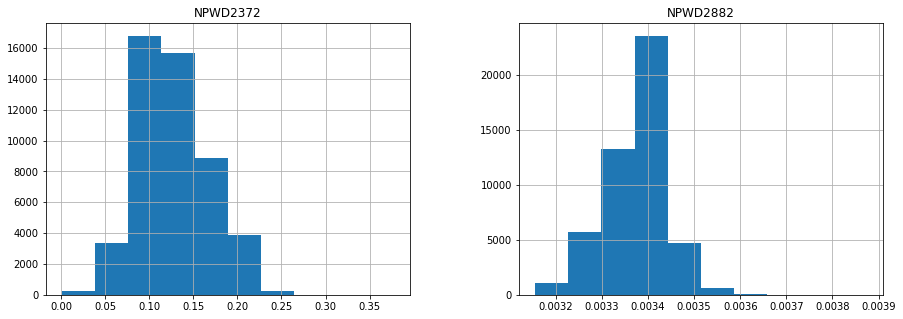

SAAF
                            sa         sx         sy          sz
ut_ms                                                           
2008-08-22 00:00:00   0.339355  14.551129  90.339355  104.548871
2008-08-22 01:00:00   6.619310  18.012184  90.500460   90.396437
2008-08-22 02:00:00  30.927137  37.511806  64.618150   86.910793

saaf [min, max] = [ 0.0 ,  179.88916666666668 ]

LTDATA
              sunmars_km  earthmars_km  sunmarsearthangle_deg  \
ut_ms                                                           
2008-08-22  2.419389e+08  3.557560e+08              19.565076   
2008-08-23  2.418002e+08  3.563037e+08              19.390075   
2008-08-24  2.416603e+08  3.568432e+08              19.214734   

            solarconstantmars  eclipseduration_min  occultationduration_min  
ut_ms                                                                        
2008-08-22         522.263999             4.166667                27.400000  
2008-08-23         522.863537             1.783333   

In [7]:
INPUT_DOWNLOAD_LOCAL = True
if ('INPUT_DOWNLOAD' in globals() and INPUT_DOWNLOAD) or INPUT_DOWNLOAD_LOCAL:
    print("Analyzing the data")
    execute_notebook("create_dataset/", "analyze_dataset.ipynb")

# 3. Quality Gates

-------------
**Legend**
- Quality Gate = QG
- Quality Check = QC
-------------

## QG1: Representative data

QG1 tries to solve the question: Are the data representative to solve my problem?. 

The data have to contain some criterium to be considered representative. That criterium we got from the Ontology and can be added to the Ontology automatically or manually.

## QG1-QC1: Checking the Range

    Check whether the range of the values are valid.

We should keep the **range** as follow:

* min value
* maximum value

In IMLO1, we stored the minimum and maximum values of all the features. Thereby, all those values are in the ML Space Ontology. 

Then, the steps to follow are:

1. For each feature f, 
    - get the f.name in the ML Space Ontology
    - we take the values min and max 
    - check if the min and max values are in the range of Ontology(f), if not we store it in a list.
2. If the list is not empty, we through a Warning message and stop

### 1. Load the QC

In [8]:
INPUT_DOWNLOAD=False
execute_notebook("QGs/", "DEM-QG1-QC1-Checking-range.ipynb")

Power :
Saaf :
 -> risks range: 
 ['sa', 'sx', 'sy', 'sz']
Ltdata :
 -> risks range: 
 ['sunmars_km', 'earthmars_km', 'sunmarsearthangle_deg', 'solarconstantmars', 'eclipseduration_min', 'occultationduration_min']
Dmop :
 -> risks range: 
 ['AAA', 'HHH', 'MMM', 'OOO', 'PSF', 'PWF', 'SEQ', 'SSS', 'SXX', 'TMB', 'TTT', 'VVV', 'XXX', 'ACF', 'DMC', 'DMF']
Ftl :
 -> risks range: 
 ['flagcomms']


### 2. Applying the QC1 to all the features:

In [9]:
(power_risks_range, power_unknown) = check_range(power_all, g)
(saaf_risks_range, saaf_unknown) = check_range(saaf_all, g)
(ltdata_risks_range, ltdata_unknown) = check_range(ltdata_all, g)
(dmop_risks_range, dmop_unknown) = check_range(dmop_all, g)
(ftl_risks_range, ftl_unknown) = check_range(ftl_df, g)

print_risks_range("Power", power_risks_range, power_unknown)
print_risks_range("Saaf", saaf_risks_range, saaf_unknown)
print_risks_range("Ltdata", ltdata_risks_range, ltdata_unknown)
print_risks_range("Dmop", dmop_risks_range, dmop_unknown)
print_risks_range("Ftl", ftl_risks_range, ftl_unknown)

Power :
Saaf :
 -> risks range: 
 ['sa', 'sx', 'sy', 'sz']
Ltdata :
 -> risks range: 
 ['sunmars_km', 'earthmars_km', 'sunmarsearthangle_deg', 'solarconstantmars', 'eclipseduration_min', 'occultationduration_min']
Dmop :
 -> risks range: 
 ['AAA', 'HHH', 'MMM', 'OOO', 'PSF', 'PWF', 'SEQ', 'SSS', 'SXX', 'TMB', 'TTT', 'VVV', 'XXX', 'ACF', 'DMC', 'DMF']
Ftl :
 -> risks range: 
 ['flagcomms']


## QG1-QC2: Fill gaps

    The explanatory features must have the same sampling as the predicted feature. 

They are different techniques:

* nearest value
* fill with zero value
* mean between the nearest value

**Current approach**:

We apply a fill gap technique to specific features f


In [10]:
print("df: ", df.shape)
print("power: ", power_all.shape)
print("saaf: ",saaf_all.shape)
print("ltdata: ", ltdata_all.shape)
print("dmop: ", dmop_all.shape)

df:  (65613, 33)
power:  (65613, 33)
saaf:  (63540, 4)
ltdata:  (2748, 6)
dmop:  (65618, 16)


### 1. Load and execute the QC

In [11]:
INPUT_DOWNLOAD=False
execute_notebook("QGs/", "DEM-QG1-QC2-Fill-gaps.ipynb")

### 2. Looking the data

In [12]:
print("df: ", df.shape)
print("power: ", power_all.shape)
print("saaf: ",saaf_all.shape)
print("ltdata: ", ltdata_all.shape)
print("dmop: ", dmop_all.shape)

df:  (65613, 33)
power:  (65613, 33)
saaf:  (65613, 4)
ltdata:  (65613, 6)
dmop:  (65613, 16)


**FTL files**

We don't perform any modification to the FTL files.

In [13]:
print("ftl_df: ", ftl_df.shape)
print("ftl_df_sel: ", ftl_df_sel.shape)

ftl_df:  (65613, 20)
ftl_df_sel:  (65613, 11)


## QG1-QC3: Great expectation library

    Analyze the content of the data with the help of Great expectations library.

### 1. Load the QC

In [14]:
INPUT_DOWNLOAD=False
execute_notebook("QGs/", "DEM-QG1-QC3-Great-expectations.ipynb")

Exception ignored in: <function ClientResponse.__del__ at 0x7f8a5ebe1170>
Traceback (most recent call last):
  File "/home/cguz/miniconda3/lib/python3.7/site-packages/aiohttp/client_reqrep.py", line 803, in __del__
    self._connection.release()
  File "/home/cguz/miniconda3/lib/python3.7/site-packages/aiohttp/connector.py", line 171, in release
    self._key, self._protocol, should_close=self._protocol.should_close
  File "/home/cguz/miniconda3/lib/python3.7/site-packages/aiohttp/connector.py", line 650, in _release
    protocol.close()
  File "/home/cguz/miniconda3/lib/python3.7/site-packages/aiohttp/client_proto.py", line 63, in close
    transport.close()
  File "/home/cguz/miniconda3/lib/python3.7/asyncio/selector_events.py", line 663, in close
    self._loop.call_soon(self._call_connection_lost, None)
  File "/home/cguz/miniconda3/lib/python3.7/asyncio/base_events.py", line 691, in call_soon
    self._check_closed()
  File "/home/cguz/miniconda3/lib/python3.7/asyncio/base_events.

Calculating Metrics:   0%|          | 0/13 [00:00<?, ?it/s]

## QG1-QC4: Check expected distribution

    

### 1. Load the QC

In [15]:
INPUT_DOWNLOAD=False
execute_notebook("QGs/", "DEM-QG1-QC4-Check-expected-distribution.ipynb")

/home/cguz/miniconda3/lib/python3.7/site-packages/gremlin_python/structure/graph.py:35: DeprecationWarning: As of release 3.3.5, replaced by the gremlin_python.process.anonymous_traversal.traversal() function.
  DeprecationWarning)



H: [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     8    34     0     0     0     0     3     0     5    54    15
   115   310   738  2054  5830 15986 12831  9565  1571     0     6     0
     0     0     0     0     0]
ppf: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.62849873e-04 6.92111959e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.10687023e-05
 0.00000000e+00 1.01781170e-04 1.09923664e-03 3.05343511e-04
 2.34096692e-03 6.31043257e-03 1.50229008e-02 4.18117048e-02
 1.18676845e-01 3.25414758e-01 2.61190840e-01 1.94707379e

---

# 4. Store the dataset

We formulate the prediction problem `Y = f(X)`

* `Y` is the matrix that we want to predict
* `X` is the explanatory feature

## Join all the explanatory features

In [16]:
df = df.join(saaf_all)
df = df.join(ltdata_all)
df = df.join(dmop_all)
df = df.join(ftl_df_sel)
df.shape

(65613, 70)

In [17]:
Y = df[power_cols]
X = df.drop(power_cols, axis=1)

store X and Y to send it to the step 2 of the pipeline, Build Model.

In [18]:
# if the directory does not exist, we create it
if not os.path.exists(PATH_TRAIN_TO_PKL):
    os.mkdir(PATH_TRAIN_TO_PKL)

FULL_TRAIN_Y_TO_PKL = os.path.join(PATH_TRAIN_TO_PKL, NAME_TRAIN_Y_TO_PKL)
FULL_TRAIN_X_TO_PKL = os.path.join(PATH_TRAIN_TO_PKL, NAME_TRAIN_X_TO_PKL)

Y.to_pickle(FULL_TRAIN_Y_TO_PKL)
X.to_pickle(FULL_TRAIN_X_TO_PKL)

---